# Final Project

### Prediction of the salary of workers who work for NYC
Group members: Winnie Yang and Sophie Dang

#Target:

We will use six different predictive models and test which one does best in predicting the salary of NYC workers.

The models we will use are:
1. Linear Regression
2. Decision Tree
3. XGBoost
4. KNN

Following that, we will see which feautures play the biggest role in salary.





---



First let's set up the data:

In [ ]:
import pandas as pd
import numpy as np

data = 'https://data.cityofnewyork.us/api/views/k397-673e/rows.csv'

In [ ]:
## data overview
df = pd.read_csv(data)
df.head()

/tmp/ipython-input-827703146.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data)


,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,NaN,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
1,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,M,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
2,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,NaN,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
3,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,D,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
4,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,P,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6775830 entries, 0 to 6775829
Data columns (total 17 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Fiscal Year                 int64  
 1   Payroll Number              float64
 2   Agency Name                 object 
 3   Last Name                   object 
 4   First Name                  object 
 5   Mid Init                    object 
 6   Agency Start Date           object 
 7   Work Location Borough       object 
 8   Title Description           object 
 9   Leave Status as of June 30  object 
 10  Base Salary                 float64
 11  Pay Basis                   object 
 12  Regular Hours               float64
 13  Regular Gross Paid          float64
 14  OT Hours                    float64
 15  Total OT Paid               float64
 16  Total Other Pay             float64
dtypes: float64(7), int64(1), object(9)
memory usage: 878.8+ MB


In [ ]:
target = "Base Salary"

In [ ]:
#Drop rows with missing target values
df = df.dropna(subset=[target])

In [ ]:
features = [
    "Agency Name",
    "Title Description",
    "Pay Basis",
    "Regular Hours",
    "Regular Gross Paid"
]

df = df[features + [target]]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [ ]:
#separate feature from target variable
X = df.drop(columns=[target])
y = df[target]

In [ ]:
categorical_features = ["Agency Name", "Title Description", "Pay Basis"]
numeric_features = ["Regular Hours", "Regular Gross Paid"]

In [ ]:
#preprocess data - standardize numerical & one hot encode categorical
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", StandardScaler(), numeric_features)
    ]
)

In [ ]:
#split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Linear** **Regression Model**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

In [ ]:
#fit linear regression model
lr_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", LinearRegression())
    ]
)

In [ ]:
#train model
lr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Agency Name',
                                                   'Title Description',
                                                   'Pay Basis']),
                                                 ('num', StandardScaler(),
                                                  ['Regular Hours',
                                                   'Regular Gross Paid'])])),
                ('regressor', LinearRegression())])

In [ ]:
#make predictions
y_pred = lr_model.predict(X_test)

In [ ]:
#evaluate mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:,.2f}")

RMSE: 11,093.56


In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

R² Score: 0.9398


It evaluates its performance using R-squared and mean squared error. R-squared shows how well the model explains the differences in workers’ salaries. The mean squared error measures the difference between the predicted and actual salaries. These metrics show how accurate the model’s predictions are and how well they follow given salary patterns.

Let's use this model to look at which features have the most effect on workers' salaries.

In [ ]:
feature_names = lr_model.named_steps["preprocessor"].get_feature_names_out()
coefficients = lr_model.named_steps["regressor"].coef_

In [ ]:
importance = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
})

In [ ]:
#assign feature group based on prefix
def map_feature_group(feature_name):
    if feature_name.startswith("cat__Agency Name"):
        return "Agency"
    elif feature_name.startswith("cat__Pay Basis"):
        return "Pay Basis"
    elif feature_name.startswith("cat__Title Description"):
        return "Job Title"
    elif feature_name.startswith("num__Regular Hours"):
        return "Regular Hours"
    elif feature_name.startswith("num__Regular Gross Paid"):
        return "Regular Gross Paid"
    else:
        return "Other"

In [ ]:
#map feature to corresponding feature group
importance["Feature Group"] = importance["Feature"].apply(map_feature_group)

#calculate the mean absolute coefficient for each feature group
group_importance = (
    importance
    .groupby("Feature Group")["Coefficient"]
    .apply(lambda x: np.mean(np.abs(x)))
    .reset_index()
    .rename(columns={"Coefficient": "Mean Absolute Coefficient"})
    .sort_values(by="Mean Absolute Coefficient", ascending=False))

print("Feature-level importance:")
print(group_importance)

Feature-level importance:
        Feature Group  Mean Absolute Coefficient
1           Job Title               31400.506816
2           Pay Basis               24032.374281
3  Regular Gross Paid               16931.320248
4       Regular Hours               10201.188261
0              Agency                4644.221600


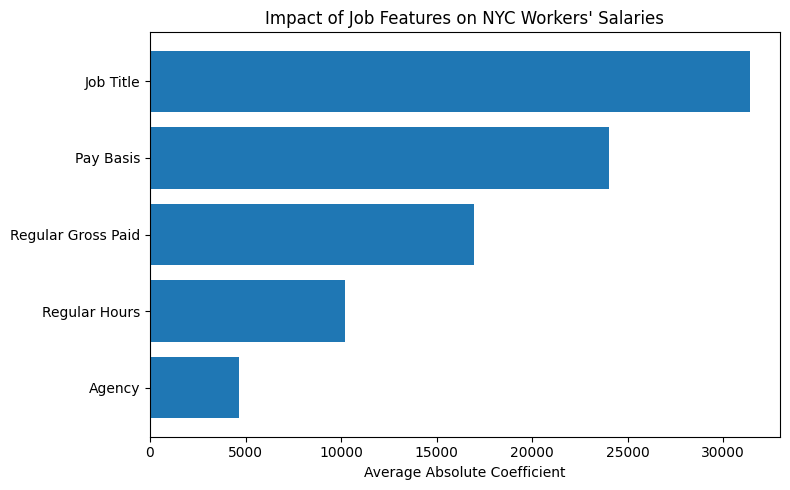

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
plt.barh(
    group_importance["Feature Group"],
    group_importance["Mean Absolute Coefficient"]
)
plt.xlabel("Average Absolute Coefficient")
plt.title("Impact of Job Features on NYC Workers' Salaries")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

 The model then identifies “Job Basis” as the top influential feature and “Agency” as the least influential feature. Because the coefficients for these features are all positive, they contribute to an increase in salary.

**Decision tree model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", DecisionTreeRegressor(max_depth=10, random_state=42))
])

dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, dt_preds)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:,.2f}")

RMSE: 8,217.30


In [ ]:
dt_model.score(X_test, y_test)

0.9669932863283996

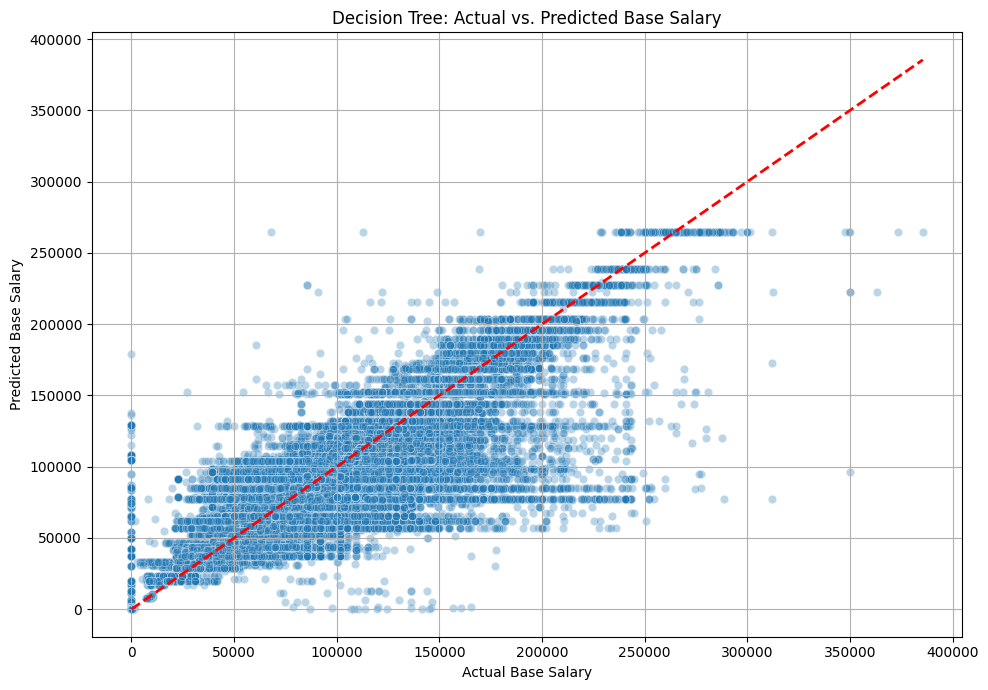

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## plot to visualize the model
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=dt_preds, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Decision Tree: Actual vs. Predicted Base Salary')
plt.xlabel('Actual Base Salary')
plt.ylabel('Predicted Base Salary')
plt.grid(True)
plt.tight_layout()
plt.show()

The Decision Tree model with max_depth=10 achieved an RMSE of 8,220.36 and an R² score of 0.9670, indicating better performance than the Linear Regression model. The Decision Tree Regressor delivered a very strong predictive performance, with an R² score of 0.9670, indicating it explains approximately 96.7% of the variance in salaries. This is an excellent result, suggesting the model has captured the underlying data patterns effectively.

Let's look at which features matters most on the Decision Tree model

In [ ]:
tree = dt_model.named_steps["model"]
ohe = dt_model.named_steps["preprocessor"] \
              .named_transformers_["cat"]

cat_features = ohe.get_feature_names_out(categorical_features)
all_features = list(cat_features) + numeric_features
importances = tree.feature_importances_


feature_importance_df = pd.DataFrame({
    "feature": all_features,
    "importance": importances
}).sort_values(by="importance", ascending=False)

feature_importance_df.head(10)


,feature,importance
2179,Pay Basis_per Annum,0.711460
2183,Regular Gross Paid,0.242962
75,Agency Name_DEPT OF ED PEDAGOGICAL,0.016947
2182,Regular Hours,0.011222
74,Agency Name_DEPT OF ED PARA PROFESSIONALS,0.005356
905,Title Description_CUSTODIAN ENGINEER,0.004459
2178,Pay Basis_Prorated Annual,0.002765
1661,Title Description_PRINCIPAL,0.001237
1647,Title Description_POLICE OFFICER,0.001182
1785,Title Description_SCHOOL SECRETARY,0.000661


The top features it identified—"Pay Basis_per Annum" and "Regular Gross Paid"—are logically sound and provide a useful, interpretable insight into the main salary determinants.

**XGBoost**

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", XGBRegressor())
])

In [ ]:
xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, xgb_preds)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:,.2f}")

RMSE: 7,077.49


In [ ]:
xgb_model.score(X_test, y_test)

0.9755148563102072

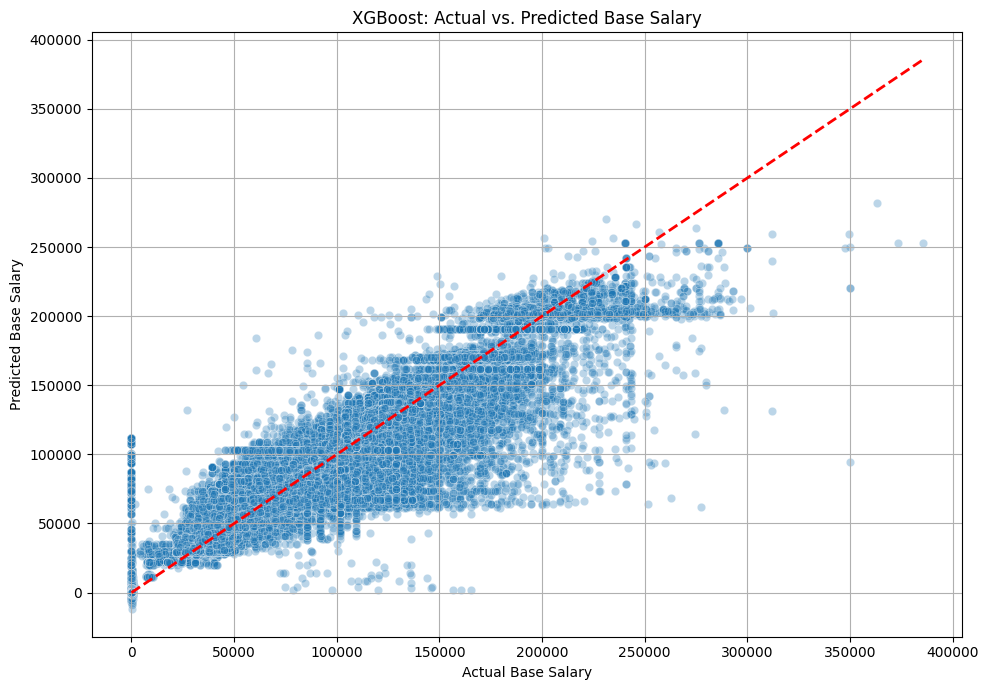

In [ ]:
## visualize model

plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=xgb_preds, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('XGBoost: Actual vs. Predicted Base Salary')
plt.xlabel('Actual Base Salary')
plt.ylabel('Predicted Base Salary')
plt.grid(True)
plt.tight_layout()
plt.show()

RMSE shows that the model’s predictions are off by around 7000 from the true salary value. The XGBoost model achieved the best performance among the regression models with an RMSE of 7,070.64 and an R² score of 0.9756. The XGBoost model’s performance is outstanding, achieving an R² of 0.9756, meaning it explains nearly all variance in salaries, and an RMSE of 7,071, indicating relatively low prediction error.

Let's look at the XGB model's feature importance

In [ ]:
feature_names = (
    preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_features).tolist()
    + numeric_features
)

In [ ]:
importances = xgb_model.named_steps["model"].feature_importances_

fi = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

fi.head(10)


,feature,importance
2179,Pay Basis_per Annum,0.544545
75,Agency Name_DEPT OF ED PEDAGOGICAL,0.097962
74,Agency Name_DEPT OF ED PARA PROFESSIONALS,0.067100
92,Agency Name_DOE CUSTODIAL PAYROL,0.035538
2183,Regular Gross Paid,0.011047
1539,Title Description_LIEUTENANT,0.010821
2178,Pay Basis_Prorated Annual,0.009804
633,Title Description_CARETAKER,0.007990
1647,Title Description_POLICE OFFICER,0.007436
1784,Title Description_SCHOOL SAFETY AGENT,0.006866


The model's identified top features—Pay Basis per Annum, Regular Gross Paid, and specific agencies—make intuitive sense.

**K-Nearest Neighbors (KNN) + Confusion Matrix**

Using a confusion matrix, the model presents which salary classes were predicted accurately and inaccurately.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#randomly sample 20000 rows from dataset
df = df.sample(20000, random_state=42)

In [ ]:
#divide base salary into 3 labels
df["Salary Class"] = pd.qcut(df["Base Salary"], 3, labels=["Low", "Medium", "High"])

In [ ]:
#separate features from target variable
X = df.drop(columns=["Base Salary", "Salary Class"])
y = df["Salary Class"]

In [ ]:
#scale numerical features & one hot encode categorical
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"),
     ["Agency Name", "Title Description", "Pay Basis"]),
    ("num", StandardScaler(),
     ["Regular Hours", "Regular Gross Paid"])
])

In [ ]:
#preprocess data and trains KNN classifier in model
model = Pipeline([
    ("prep", preprocessor),
    ("knn", KNeighborsClassifier(n_neighbors=3, n_jobs=-1))
])

In [ ]:
#split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
#fit the KNN pipeline
model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Agency Name',
                                                   'Title Description',
                                                   'Pay Basis']),
                                                 ('num', StandardScaler(),
                                                  ['Regular Hours',
                                                   'Regular Gross Paid'])])),
                ('knn', KNeighborsClassifier(n_jobs=-1, n_neighbors=3))])

In [ ]:
#make predictions
y_test_pred = model.predict(X_test)

#compute confusion matrix
labels = ["Low", "Medium", "High"]

cm = confusion_matrix(y_test_processed, y_test_pred, labels=labels)

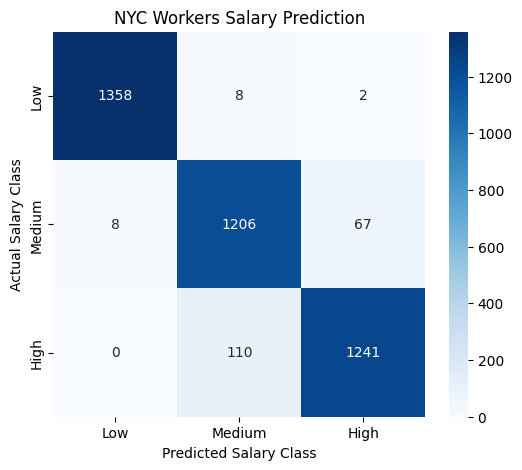

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels
)

plt.title("NYC Workers Salary Prediction")
plt.xlabel("Predicted Salary Class")
plt.ylabel("Actual Salary Class")
plt.show()

The confusion matrix heatmap visualizes the model performance. In the heatmap, each cell shows the predicted salary class aligned with the actual salary class. The diagonal cells represent an accurate class prediction, while the other cells are misclassifications. The model also displays the intensity of colors reflecting the number of workers for each category, with darker colors highlighting higher numbers of accurate classification. For misclassifications, the model primarily confuses adjacent classes, like predicting salaries in the medium class when they are actually in the high class. Whereas, between the more distinct classes, like low and high classes, the model only misclassifies two salaries.

Let's use this model to look at which features have the most effect on workers' salaries.

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
#compute permutation feature importance
result = permutation_importance(
    model,
    X_test,
    y_test,
    n_repeats=5,
    random_state=42,
    n_jobs=-1
)

In [ ]:
#get transformed feature names
feature_names = model.named_steps["prep"].get_feature_names_out()

In [ ]:
feature_names = X_test.columns.tolist()

importance = pd.DataFrame({
    "Feature": feature_names,
    "Importance": result.importances_mean
})

In [ ]:
#calculate absolute importance and assign a rank
importance["Abs Importance"] = importance["Importance"].abs()
importance = importance.sort_values("Abs Importance", ascending=False)
importance["Rank"] = range(1, len(importance) + 1)

importance[["Rank", "Feature", "Abs Importance"]].head(10).style.hide(axis="index")

Rank,Feature,Abs Importance
1,Regular Gross Paid,0.177450
2,Regular Hours,0.082250
3,Pay Basis,0.051350
4,Title Description,0.016100
5,Agency Name,0.006250


In [ ]:
top_features = importance.head(15)

/tmp/ipython-input-914865703.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


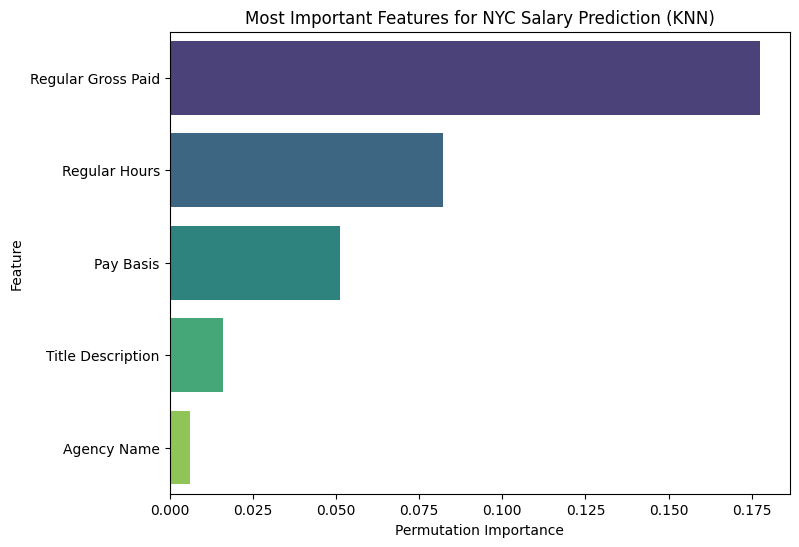

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data=top_features,
    x="Abs Importance",
    y="Feature",
    palette="viridis"
)

plt.title("Most Important Features for NYC Salary Prediction (KNN)")
plt.xlabel("Permutation Importance")
plt.ylabel("Feature")
plt.show()

 The graph indicates that “Regular Gross Paid” is the most influential factor for predicting salary, with it having the highest value in permutation importance, and “Agency Name” is the least influential, having the smallest value for permutation importance.